CAPSTONE PROJECT
---

#### Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore',FutureWarning)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT/traindata.csv')
data.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,7,20,Friday,7.192192e+09,1,FROZEN FOODS,9117.0
1,7,20,Friday,6.811311e+10,2,SERVICE DELI,4010.0
2,25,28,Friday,8.805520e+11,1,LADIESWEAR,313.0
3,25,28,Friday,8.085947e+10,1,LADIESWEAR,4447.0
4,25,28,Friday,4.900004e+09,1,DSD GROCERY,9538.0


In [ ]:
data.columns

Index(['TripType', 'VisitNumber', 'Weekday', 'Upc', 'ScanCount',
       'DepartmentDescription', 'FinelineNumber'],
      dtype='object')

In [ ]:
## Dropping UPC and Fine line number Column
data.drop(['Upc','FinelineNumber'],axis=1,inplace=True)

In [ ]:
data.head(3)

,TripType,VisitNumber,Weekday,ScanCount,DepartmentDescription
0,7,20,Friday,1,FROZEN FOODS
1,7,20,Friday,2,SERVICE DELI
2,25,28,Friday,1,LADIESWEAR


In [ ]:
data.isnull().sum()

TripType                 0
VisitNumber              0
Weekday                  0
ScanCount                0
DepartmentDescription    0
dtype: int64

In [ ]:
data['DepartmentDescription'].value_counts().to_frame()

,DepartmentDescription
GROCERY DRY GOODS,10040
DAIRY,8596
DSD GROCERY,7156
PRODUCE,5593
MENS WEAR,5285
...,...
OTHER DEPARTMENTS,4
FURNITURE,4
SEASONAL,2
CAMERAS AND SUPPLIES,2


DATA VIZUALIZATION IN TABLEAU:
https://public.tableau.com/views/WALMART_16987307649810/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link


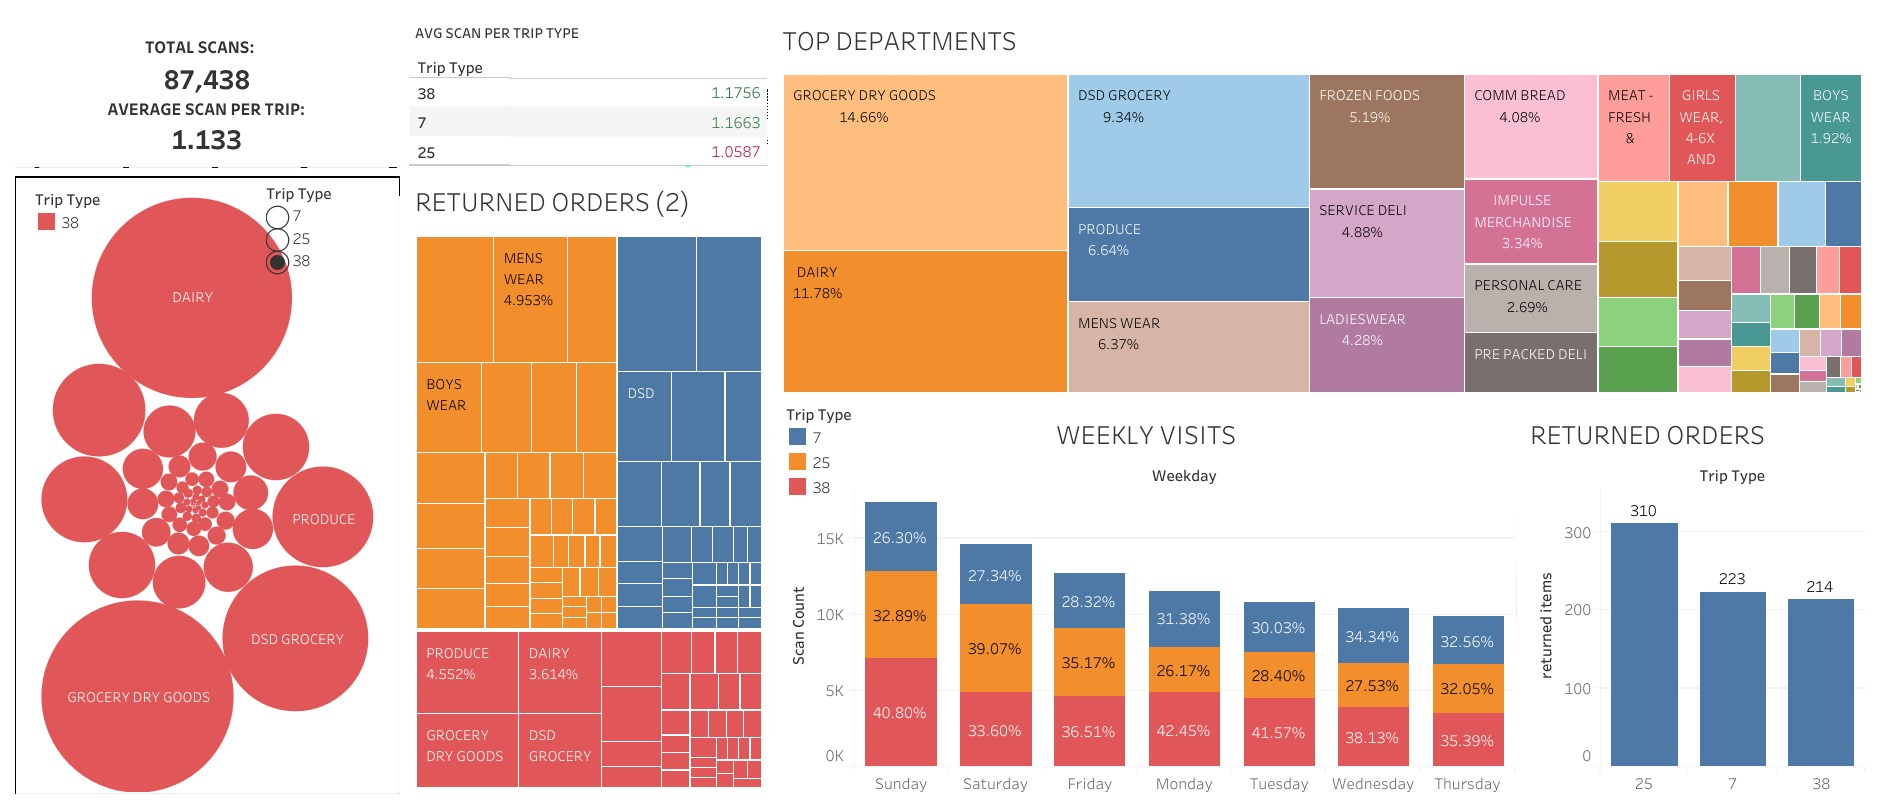

In [ ]:
data.head()

,TripType,VisitNumber,Weekday,ScanCount,DepartmentDescription
0,7,20,Friday,1,FROZEN FOODS
1,7,20,Friday,2,SERVICE DELI
2,25,28,Friday,1,LADIESWEAR
3,25,28,Friday,1,LADIESWEAR
4,25,28,Friday,1,DSD GROCERY


In [ ]:
data['P_R']=np.where(data['ScanCount']<0,'Returned','Purchased')

In [ ]:
depart_sale=data[data['P_R']=='Purchased'].groupby(['TripType','DepartmentDescription']).size()
depart_sale=depart_sale.to_frame(name='count')
depart_sale= depart_sale.sort_values(by=['count','TripType'],ascending=False)
depart_sale.reset_index(inplace=True)
depart_sale

,TripType,DepartmentDescription,count
0,38,DAIRY,6947
1,38,GROCERY DRY GOODS,6213
2,25,MENS WEAR,5159
3,38,DSD GROCERY,3851
4,25,LADIESWEAR,3552
...,...,...,...
178,25,CAMERAS AND SUPPLIES,1
179,25,PHARMACY RX,1
180,7,BRAS & SHAPEWEAR,1
181,7,FURNITURE,1


In [ ]:
depart_sale[depart_sale['TripType']==25].head()

,TripType,DepartmentDescription,count
2,25,MENS WEAR,5159
4,25,LADIESWEAR,3552
11,25,"GIRLS WEAR, 4-6X AND 7-14",1731
13,25,BOYS WEAR,1588
15,25,PERSONAL CARE,1457


In [ ]:
data[data['ScanCount']<0].head()

,TripType,VisitNumber,Weekday,ScanCount,DepartmentDescription,P_R
37,7,199,Friday,-1,DAIRY,Returned
42,38,210,Friday,-1,"CANDY, TOBACCO, COOKIES",Returned
174,25,604,Friday,-1,HOME MANAGEMENT,Returned
428,7,1459,Friday,-1,SLEEPWEAR/FOUNDATIONS,Returned
579,7,1906,Friday,-1,DSD GROCERY,Returned


In [ ]:
data.groupby(['TripType','P_R']).size().to_frame('count')

count
TripType P_R             
7        Purchased  21945
         Returned     223
25       Purchased  26183
         Returned     310
38       Purchased  28311
         Returned     214

FEATURE ENGENIEERING
---

In [ ]:
data.value_counts(['TripType','Weekday']).sort_index(ascending=True)

TripType  Weekday  
7         Friday       3078
          Monday       3127
          Saturday     3451
          Sunday       3840
          Thursday     2739
          Tuesday      2825
          Wednesday    3108
25        Friday       4231
          Monday       2811
          Saturday     5369
          Sunday       5470
          Thursday     3034
          Tuesday      2901
          Wednesday    2677
38        Friday       3951
          Monday       4175
          Saturday     4219
          Sunday       6033
          Thursday     2980
          Tuesday      3744
          Wednesday    3423
dtype: int64


___

####   Formatting weekdays
___



In [ ]:
data['Weekday'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [ ]:
weekday_map= {'Monday':1, 'Tuesday':2, 'Wednesday':3,'Thursday':4,'Friday':5, 'Saturday':6, 'Sunday':7}
data.head(3)

,TripType,VisitNumber,Weekday,ScanCount,DepartmentDescription,P_R
0,7,20,Friday,1,FROZEN FOODS,Purchased
1,7,20,Friday,2,SERVICE DELI,Purchased
2,25,28,Friday,1,LADIESWEAR,Purchased


In [ ]:
data['Weekday']=data['Weekday'].apply(lambda x: weekday_map[x])
data.head(3)

,TripType,VisitNumber,Weekday,ScanCount,DepartmentDescription,P_R
0,7,20,5,1,FROZEN FOODS,Purchased
1,7,20,5,2,SERVICE DELI,Purchased
2,25,28,5,1,LADIESWEAR,Purchased


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77186 entries, 0 to 77185
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   TripType               77186 non-null  int64 
 1   VisitNumber            77186 non-null  int64 
 2   Weekday                77186 non-null  int64 
 3   ScanCount              77186 non-null  int64 
 4   DepartmentDescription  77186 non-null  object
 5   P_R                    77186 non-null  object
dtypes: int64(4), object(2)
memory usage: 3.5+ MB


___
#### Features based on weekdays
___

In [ ]:
data['Weekday'].unique()

array([5, 6, 7, 1, 2, 3, 4])

In [ ]:
weekday_map

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [ ]:
data['Weekend']=np.where(data['Weekday']>=6,1,0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77186 entries, 0 to 77185
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   TripType               77186 non-null  int64 
 1   VisitNumber            77186 non-null  int64 
 2   Weekday                77186 non-null  int64 
 3   ScanCount              77186 non-null  int64 
 4   DepartmentDescription  77186 non-null  object
 5   P_R                    77186 non-null  object
 6   Weekend                77186 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 4.1+ MB


In [ ]:
data['Weekend'].value_counts()

0    48804
1    28382
Name: Weekend, dtype: int64

In [ ]:
data

,TripType,VisitNumber,Weekday,ScanCount,DepartmentDescription,P_R,Weekend
0,7,20,5,1,FROZEN FOODS,Purchased,0
1,7,20,5,2,SERVICE DELI,Purchased,0
2,25,28,5,1,LADIESWEAR,Purchased,0
3,25,28,5,1,LADIESWEAR,Purchased,0
4,25,28,5,1,DSD GROCERY,Purchased,0
...,...,...,...,...,...,...,...
77181,25,191343,7,2,MENS WEAR,Purchased,1
77182,25,191343,7,2,DSD GROCERY,Purchased,1
77183,25,191343,7,1,IMPULSE MERCHANDISE,Purchased,1
77184,25,191343,7,1,MENS WEAR,Purchased,1


In [ ]:
# Creating new subset Dataframe : df
df= data[['TripType','VisitNumber','Weekday','Weekend']]
df.drop_duplicates(inplace=True)
df

<ipython-input-642-02ff9be84e0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


,TripType,VisitNumber,Weekday,Weekend
0,7,20,5,0
2,25,28,5,0
10,38,43,5,0
14,7,72,5,0
17,7,76,5,0
...,...,...,...,...
77120,7,191318,7,1
77127,38,191322,7,1
77141,38,191326,7,1
77152,38,191337,7,1


In [ ]:
df.reset_index(drop=True,inplace=True)
df

,TripType,VisitNumber,Weekday,Weekend
0,7,20,5,0
1,25,28,5,0
2,38,43,5,0
3,7,72,5,0
4,7,76,5,0
...,...,...,...,...
12304,7,191318,7,1
12305,38,191322,7,1
12306,38,191326,7,1
12307,38,191337,7,1


---
#### Features based on Scan type.
___

In [ ]:
data.columns

Index(['TripType', 'VisitNumber', 'Weekday', 'ScanCount',
       'DepartmentDescription', 'P_R', 'Weekend'],
      dtype='object')

In [ ]:
data[data['P_R']=='Returned'].value_counts()

TripType  VisitNumber  Weekday  ScanCount  DepartmentDescription  P_R       Weekend
25        87158        5        -1         ACCESSORIES            Returned  0          5
7         146742       7        -1         GROCERY DRY GOODS      Returned  1          5
25        18400        7        -1         PRODUCE                Returned  1          4
          80851        3        -1         BOYS WEAR              Returned  0          3
          10607        6        -1         INFANT APPAREL         Returned  1          3
                                                                                      ..
          30305        2        -1         BOYS WEAR              Returned  0          1
          32845        3        -1         TOYS                   Returned  0          1
          32992        3        -1         IMPULSE MERCHANDISE    Returned  0          1
          36509        3        -1         BEAUTY                 Returned  0          1
7         199          5  

In [ ]:
df_buy1 = data.groupby('VisitNumber').agg({'ScanCount':'sum'}).reset_index()
df_buy1

,VisitNumber,ScanCount
0,20,3
1,28,8
2,43,4
3,72,3
4,76,4
...,...,...
12304,191318,7
12305,191322,15
12306,191326,11
12307,191337,26


In [ ]:
# concating the new feature in df_buy1 to the df
df = pd.concat([df, df_buy1['ScanCount']], axis=1, )

In [ ]:
df

,TripType,VisitNumber,Weekday,Weekend,ScanCount
0,7,20,5,0,3
1,25,28,5,0,8
2,38,43,5,0,4
3,7,72,5,0,3
4,7,76,5,0,4
...,...,...,...,...,...
12304,7,191318,7,1,7
12305,38,191322,7,1,15
12306,38,191326,7,1,11
12307,38,191337,7,1,26


In [ ]:
df.rename(columns={'ScanCount':'ScanCountNet'},inplace=True)
df

,TripType,VisitNumber,Weekday,Weekend,ScanCountNet
0,7,20,5,0,3
1,25,28,5,0,8
2,38,43,5,0,4
3,7,72,5,0,3
4,7,76,5,0,4
...,...,...,...,...,...
12304,7,191318,7,1,7
12305,38,191322,7,1,15
12306,38,191326,7,1,11
12307,38,191337,7,1,26


In [ ]:
#creating subset of the data
df_scantype =  data[['VisitNumber','ScanCount']]

In [ ]:
# Creating new features
df_scantype['Buy']=np.where(data['ScanCount']>0,data['ScanCount'],0)
df_scantype['Return']=np.where(data['ScanCount']<0,data['ScanCount'],0)

<ipython-input-651-f9f94dfbca97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scantype['Buy']=np.where(data['ScanCount']>0,data['ScanCount'],0)
<ipython-input-651-f9f94dfbca97>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scantype['Return']=np.where(data['ScanCount']<0,data['ScanCount'],0)


In [ ]:
#aggregating the rows based on "VisitNumber"
df_scantype=df_scantype.groupby('VisitNumber').agg({'Buy':'sum','Return':'sum'}).reset_index()
df_scantype

,VisitNumber,Buy,Return
0,20,3,0
1,28,8,0
2,43,4,0
3,72,3,0
4,76,4,0
...,...,...,...
12304,191318,7,0
12305,191322,15,0
12306,191326,11,0
12307,191337,28,-2


In [ ]:
# concat to the 2 new features of "df_scantype" to the "df".

In [ ]:
df = pd.concat([df, df_scantype[['Buy','Return']]], axis=1, )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12309 entries, 0 to 12308
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   TripType      12309 non-null  int64
 1   VisitNumber   12309 non-null  int64
 2   Weekday       12309 non-null  int64
 3   Weekend       12309 non-null  int64
 4   ScanCountNet  12309 non-null  int64
 5   Buy           12309 non-null  int64
 6   Return        12309 non-null  int64
dtypes: int64(7)
memory usage: 673.3 KB


In [ ]:
df[df['Return']<-1]

,TripType,VisitNumber,Weekday,Weekend,ScanCountNet,Buy,Return
215,25,3687,5,0,10,12,-2
262,38,4461,5,0,16,18,-2
318,25,5552,5,0,20,22,-2
461,25,8226,6,1,11,15,-4
574,38,10080,6,1,3,5,-2
...,...,...,...,...,...,...,...
11411,7,176955,5,0,3,5,-2
11610,25,180316,6,1,18,22,-4
11671,38,181289,6,1,9,12,-3
12052,25,187673,7,1,7,9,-2


___
#### Feature: Visit count
___

In [ ]:
data.columns

Index(['TripType', 'VisitNumber', 'Weekday', 'ScanCount',
       'DepartmentDescription', 'P_R', 'Weekend'],
      dtype='object')

In [ ]:
#create subset of the data
df_visitcount = data[['VisitNumber','ScanCount']]
df_visitcount.head(15)

,VisitNumber,ScanCount
0,20,1
1,20,2
2,28,1
3,28,1
4,28,1
5,28,1
6,28,1
7,28,1
8,28,1
9,28,1


In [ ]:
df_visitcount=df_visitcount.groupby('VisitNumber')['ScanCount'].count().reset_index()
df_visitcount

,VisitNumber,ScanCount
0,20,2
1,28,8
2,43,4
3,72,3
4,76,4
...,...,...
12304,191318,7
12305,191322,14
12306,191326,11
12307,191337,27


In [ ]:
#concating "df_visitcount" to "df"

In [ ]:
df = pd.concat([df, df_visitcount['ScanCount']], axis=1)
df.rename(columns={'ScanCount':'TotalVisits'},inplace=True)

In [ ]:
df

,TripType,VisitNumber,Weekday,Weekend,ScanCountNet,Buy,Return,TotalVisits
0,7,20,5,0,3,3,0,2
1,25,28,5,0,8,8,0,8
2,38,43,5,0,4,4,0,4
3,7,72,5,0,3,3,0,3
4,7,76,5,0,4,4,0,4
...,...,...,...,...,...,...,...,...
12304,7,191318,7,1,7,7,0,7
12305,38,191322,7,1,15,15,0,14
12306,38,191326,7,1,11,11,0,11
12307,38,191337,7,1,26,28,-2,27


___
#### Creating Features based on the 'Department Description'
___

In [ ]:
data['DepartmentDescription'].nunique()

64

In [ ]:
# Using OneHotEncoding to "DepartmentDescription" Columns

In [ ]:
purchase_department = pd.get_dummies(data['DepartmentDescription'])

In [ ]:
purchase_department = pd.concat([data['VisitNumber'],purchase_department],axis=1)

In [ ]:
purchase_department.head()

,VisitNumber,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
0,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
purchase_department=purchase_department.groupby('VisitNumber').sum().reset_index()
purchase_department.drop('VisitNumber',axis=1,inplace=True)

___
#### Creating Final dataframe df
___

In [ ]:
#concating "purchase_department" to "df"
df.shape,purchase_department.shape

((12309, 8), (12309, 64))

In [ ]:
df = pd.concat([df, purchase_department], axis=1)
df

,TripType,VisitNumber,Weekday,Weekend,ScanCountNet,Buy,Return,TotalVisits,1-HR PHOTO,ACCESSORIES,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
0,7,20,5,0,3,3,0,2,0,0,...,0,0,1,0,0,0,0,0,0,0
1,25,28,5,0,8,8,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38,43,5,0,4,4,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,72,5,0,3,3,0,3,0,0,...,0,0,1,0,0,0,0,0,0,0
4,7,76,5,0,4,4,0,4,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12304,7,191318,7,1,7,7,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
12305,38,191322,7,1,15,15,0,14,0,0,...,0,0,0,0,0,0,0,0,0,0
12306,38,191326,7,1,11,11,0,11,0,0,...,0,0,0,0,0,0,0,0,0,0
12307,38,191337,7,1,26,28,-2,27,0,0,...,0,0,0,0,0,0,0,0,0,0


___
### LABELS AND FEATURES
___

In [ ]:
x=df.iloc[:,1:]
y=df['TripType']
x.shape,y.shape

((12309, 71), (12309,))

In [ ]:
x

,VisitNumber,Weekday,Weekend,ScanCountNet,Buy,Return,TotalVisits,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
0,20,5,0,3,3,0,2,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,28,5,0,8,8,0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,5,0,4,4,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,72,5,0,3,3,0,3,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,76,5,0,4,4,0,4,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12304,191318,7,1,7,7,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12305,191322,7,1,15,15,0,14,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12306,191326,7,1,11,11,0,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12307,191337,7,1,26,28,-2,27,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x.columns

Index(['VisitNumber', 'Weekday', 'Weekend', 'ScanCountNet', 'Buy', 'Return',
       'TotalVisits', '1-HR PHOTO', 'ACCESSORIES', 'AUTOMOTIVE', 'BAKERY',
       'BATH AND SHOWER', 'BEAUTY', 'BEDDING', 'BOOKS AND MAGAZINES',
       'BOYS WEAR', 'BRAS & SHAPEWEAR', 'CAMERAS AND SUPPLIES',
       'CANDY, TOBACCO, COOKIES', 'CELEBRATION', 'COMM BREAD', 'COOK AND DINE',
       'DAIRY', 'DSD GROCERY', 'ELECTRONICS', 'FABRICS AND CRAFTS',
       'FINANCIAL SERVICES', 'FROZEN FOODS', 'FURNITURE',
       'GIRLS WEAR, 4-6X  AND 7-14', 'GROCERY DRY GOODS', 'HARDWARE',
       'HOME DECOR', 'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
       'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
       'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
       'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
       'LAWN AND GARDEN', 'LIQUOR,WINE,BEER', 'MEAT - FRESH & FROZEN',
       'MEDIA AND GAMING', 'MENS WEAR', 'MENSWEAR', 'OFFICE SUPPLIES',
       'OPTICAL - FRAMES', 

___
### STANDARDIZING THE DATA
___

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()
features=pd.DataFrame(ss.fit_transform(x))
features

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,-1.757978,0.376857,-0.711636,-0.605397,-0.610526,0.197823,-0.741260,-0.020678,-0.079655,-0.088885,...,-0.145235,-0.012748,0.961523,-0.054359,-0.16016,-0.161845,-0.090219,-0.103583,-0.099774,-0.040856
1,-1.757833,0.376857,-0.711636,0.132247,0.121727,0.197823,0.300153,-0.020678,-0.079655,-0.088885,...,-0.145235,-0.012748,-0.456738,-0.054359,-0.16016,-0.161845,-0.090219,-0.103583,-0.099774,-0.040856
2,-1.757561,0.376857,-0.711636,-0.457868,-0.464076,0.197823,-0.394122,-0.020678,-0.079655,-0.088885,...,-0.145235,-0.012748,-0.456738,-0.054359,-0.16016,-0.161845,-0.090219,-0.103583,-0.099774,-0.040856
3,-1.757035,0.376857,-0.711636,-0.605397,-0.610526,0.197823,-0.567691,-0.020678,-0.079655,-0.088885,...,-0.145235,-0.012748,0.961523,-0.054359,-0.16016,-0.161845,-0.090219,-0.103583,-0.099774,-0.040856
4,-1.756963,0.376857,-0.711636,-0.457868,-0.464076,0.197823,-0.394122,-0.020678,-0.079655,-0.088885,...,4.609285,-0.012748,-0.456738,-0.054359,-0.16016,-0.161845,-0.090219,-0.103583,-0.099774,-0.040856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12304,1.708293,1.360264,1.405214,-0.015281,-0.024724,0.197823,0.126584,-0.020678,-0.079655,-0.088885,...,-0.145235,-0.012748,-0.456738,-0.054359,-0.16016,-0.161845,-0.090219,-0.103583,-0.099774,-0.040856
12305,1.708366,1.360264,1.405214,1.164950,1.146881,0.197823,1.341566,-0.020678,-0.079655,-0.088885,...,-0.145235,-0.012748,-0.456738,-0.054359,-0.16016,-0.161845,-0.090219,-0.103583,-0.099774,-0.040856
12306,1.708438,1.360264,1.405214,0.574834,0.561079,0.197823,0.820860,-0.020678,-0.079655,-0.088885,...,-0.145235,-0.012748,-0.456738,-0.054359,-0.16016,-0.161845,-0.090219,-0.103583,-0.099774,-0.040856
12307,1.708638,1.360264,1.405214,2.787767,3.050740,-5.866936,3.597961,-0.020678,-0.079655,-0.088885,...,-0.145235,-0.012748,-0.456738,-0.054359,-0.16016,-0.161845,-0.090219,-0.103583,-0.099774,-0.040856


___
### Train Test Split
___

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(features,y,stratify=y,random_state=80,test_size=0.20)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((9847, 71), (2462, 71), (9847,), (2462,))

## MODEL 1

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt= DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
predictm1 = dt.predict(xtest)
predictm1[:5]

array([25,  7,  7,  7, 25])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(ytest, predictm1)

0.8992688870836718

In [ ]:
print(classification_report(ytest,predictm1))

              precision    recall  f1-score   support

           7       0.89      0.91      0.90      1140
          25       0.98      0.96      0.97       740
          38       0.81      0.81      0.81       582

    accuracy                           0.90      2462
   macro avg       0.89      0.89      0.89      2462
weighted avg       0.90      0.90      0.90      2462



## MODEL 2

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
predictm2 = rf.predict(xtest)
predictm2[:5]

array([25, 38,  7,  7, 25])

In [ ]:
accuracy_score(ytest,predictm2)

0.9268887083671812

In [ ]:
print(classification_report(ytest,predictm2))

              precision    recall  f1-score   support

           7       0.92      0.94      0.93      1140
          25       0.97      0.98      0.98       740
          38       0.88      0.84      0.86       582

    accuracy                           0.93      2462
   macro avg       0.92      0.92      0.92      2462
weighted avg       0.93      0.93      0.93      2462



# EXPORT THE MODEL

In [ ]:
#importing the pickle library
import pickle
#using model 2 as it has 92% Accuracy Score
with open ('RandomForest_TripType_Prediction','wb') as file:
  pickle.dump(rf,file)

In [ ]:
with open('SS_TripType_prediction','wb')as file:
  pickle.dump(ss,file)

# Loading the Test file

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT/testdata.csv')

In [ ]:
test_df.head()

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,87,Friday,7.106841e+09,1,FROZEN FOODS,4063
1,361,Friday,6.727878e+10,1,MENS WEAR,1605
2,385,Friday,2.840007e+09,1,DSD GROCERY,4551
3,413,Friday,2.200000e+09,1,IMPULSE MERCHANDISE,135
4,462,Friday,7.282133e+10,1,PLUS AND MATERNITY,744


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VisitNumber            3000 non-null   int64  
 1   Weekday                3000 non-null   object 
 2   Upc                    3000 non-null   float64
 3   ScanCount              3000 non-null   int64  
 4   DepartmentDescription  3000 non-null   object 
 5   FinelineNumber         3000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 140.8+ KB


___
## Feature Engenieering - test_df
___

#### Formatting weekdays

In [ ]:
test_df['Weekday'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [ ]:
# weekday_map created previously.
weekday_map

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [ ]:
test_df['Weekday']=test_df['Weekday'].apply(lambda x: weekday_map[x])
test_df.head(3)

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,87,5,7.106841e+09,1,FROZEN FOODS,4063
1,361,5,6.727878e+10,1,MENS WEAR,1605
2,385,5,2.840007e+09,1,DSD GROCERY,4551


In [ ]:
test_df['Weekend']=np.where(test_df['Weekday']>5,1,0)

In [ ]:
test_df

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,Weekend
0,87,5,7.106841e+09,1,FROZEN FOODS,4063,0
1,361,5,6.727878e+10,1,MENS WEAR,1605,0
2,385,5,2.840007e+09,1,DSD GROCERY,4551,0
3,413,5,2.200000e+09,1,IMPULSE MERCHANDISE,135,0
4,462,5,7.282133e+10,1,PLUS AND MATERNITY,744,0
...,...,...,...,...,...,...,...
2995,191158,7,5.010046e+09,5,FROZEN FOODS,4138,1
2996,191164,7,7.874235e+09,1,DAIRY,1508,1
2997,191225,7,7.047049e+09,1,DAIRY,1344,1
2998,191256,7,4.393559e+09,1,MENS WEAR,5542,1


In [ ]:
# Creating New Data Subset
test_df.columns

Index(['VisitNumber', 'Weekday', 'Upc', 'ScanCount', 'DepartmentDescription',
       'FinelineNumber', 'Weekend'],
      dtype='object')

In [ ]:
test_df_1= test_df[['VisitNumber','Weekday','Weekend']]
test_df_1.drop_duplicates(inplace=True)
test_df_1.reset_index(drop=True, inplace=True)
test_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   VisitNumber  2512 non-null   int64
 1   Weekday      2512 non-null   int64
 2   Weekend      2512 non-null   int64
dtypes: int64(3)
memory usage: 59.0 KB


<ipython-input-699-870da8fe77e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_1.drop_duplicates(inplace=True)


In [ ]:
test_df_total_scan=test_df.groupby('VisitNumber')['ScanCount'].sum()

In [ ]:
test_df_total_scan=test_df_total_scan.to_frame()
test_df_total_scan.reset_index(inplace=True)

In [ ]:
test_df_2 = pd.concat([test_df_1,test_df_total_scan['ScanCount']],axis=1)

In [ ]:
test_df_2

,VisitNumber,Weekday,Weekend,ScanCount
0,87,5,0,1
1,361,5,0,1
2,385,5,0,1
3,413,5,0,1
4,462,5,0,1
...,...,...,...,...
2507,191158,7,1,5
2508,191164,7,1,1
2509,191225,7,1,1
2510,191256,7,1,1


### Feature Based on Scan Type

In [ ]:
test_df.columns

Index(['VisitNumber', 'Weekday', 'Upc', 'ScanCount', 'DepartmentDescription',
       'FinelineNumber', 'Weekend'],
      dtype='object')

In [ ]:
test_df_buy = test_df.groupby('VisitNumber').agg({'ScanCount':'sum'}).reset_index()
test_df_buy.rename(columns={'ScanCount':'ScanCountNet'},inplace=True)
test_df_buy

,VisitNumber,ScanCountNet
0,87,1
1,361,1
2,385,1
3,413,1
4,462,1
...,...,...
2507,191158,5
2508,191164,1
2509,191225,1
2510,191256,1


In [ ]:
test_df_3 = pd.concat([test_df_2, test_df_buy['ScanCountNet']], axis=1, )

In [ ]:
test_df_3

,VisitNumber,Weekday,Weekend,ScanCount,ScanCountNet
0,87,5,0,1,1
1,361,5,0,1,1
2,385,5,0,1,1
3,413,5,0,1,1
4,462,5,0,1,1
...,...,...,...,...,...
2507,191158,7,1,5,5
2508,191164,7,1,1,1
2509,191225,7,1,1,1
2510,191256,7,1,1,1


In [ ]:
#creating subset of the data
test_df_scantype =  test_df[['VisitNumber','ScanCount']]

In [ ]:
# Creating new features
test_df_scantype['Buy']=np.where(test_df['ScanCount']>0,test_df['ScanCount'],0)
test_df_scantype['Return']=np.where(test_df['ScanCount']<0,test_df['ScanCount'],0)

<ipython-input-709-9409dcf52ea0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_scantype['Buy']=np.where(test_df['ScanCount']>0,test_df['ScanCount'],0)
<ipython-input-709-9409dcf52ea0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_scantype['Return']=np.where(test_df['ScanCount']<0,test_df['ScanCount'],0)


In [ ]:
#aggregating the rows based on "VisitNumber"
test_df_scantype=test_df_scantype.groupby('VisitNumber').agg({'Buy':'sum','Return':'sum'}).reset_index()
test_df_scantype

,VisitNumber,Buy,Return
0,87,1,0
1,361,1,0
2,385,1,0
3,413,1,0
4,462,1,0
...,...,...,...
2507,191158,5,0
2508,191164,1,0
2509,191225,1,0
2510,191256,1,0


In [ ]:
test_df_scantype[test_df_scantype['Return']<0]

,VisitNumber,Buy,Return
314,22999,0,-1
386,28257,2,-2
886,71496,0,-1
898,72376,1,-1
956,76739,1,-1
1023,82194,0,-2
1280,102806,0,-1
1365,108844,1,-1
1404,111624,0,-1
1482,117391,0,-1


In [ ]:
# concat to the 2 new features of "test_df_scantype" to the "test_df_3".

In [ ]:
test_df_3 = pd.concat([test_df_3, test_df_scantype[['Buy','Return']]], axis=1, )

In [ ]:
test_df_3[test_df_3['Return']<0]

,VisitNumber,Weekday,Weekend,ScanCount,ScanCountNet,Buy,Return
314,22999,1,0,-1,-1,0,-1
386,28257,2,0,0,0,2,-2
886,71496,2,0,-1,-1,0,-1
898,72376,2,0,0,0,1,-1
956,76739,3,0,0,0,1,-1
1023,82194,4,0,-2,-2,0,-2
1280,102806,7,1,-1,-1,0,-1
1365,108844,1,0,0,0,1,-1
1404,111624,1,0,-1,-1,0,-1
1482,117391,2,0,-1,-1,0,-1


#### Test data Feature- Visit Count

In [ ]:
test_df_visitcount = test_df[['VisitNumber','ScanCount']]
test_df_visitcount.head(11)

,VisitNumber,ScanCount
0,87,1
1,361,1
2,385,1
3,413,1
4,462,1
5,943,1
6,1021,1
7,1117,1
8,1184,1
9,1187,1


In [ ]:
test_df_visitcount1=test_df_visitcount.groupby('VisitNumber')['ScanCount'].count().to_frame().reset_index()
test_df_visitcount1.head(11)
test_df_visitcount1=test_df_visitcount1.rename(columns={'ScanCount':'TotalVisits'})

In [ ]:
#concatting to the main dataframe
test_df_4 = pd.concat([test_df_3,test_df_visitcount1['TotalVisits']],axis=1)

In [ ]:
test_df_4

,VisitNumber,Weekday,Weekend,ScanCount,ScanCountNet,Buy,Return,TotalVisits
0,87,5,0,1,1,1,0,1
1,361,5,0,1,1,1,0,1
2,385,5,0,1,1,1,0,1
3,413,5,0,1,1,1,0,1
4,462,5,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...
2507,191158,7,1,5,5,5,0,1
2508,191164,7,1,1,1,1,0,1
2509,191225,7,1,1,1,1,0,1
2510,191256,7,1,1,1,1,0,1


#### Test data Feature- Department Decription

In [ ]:
test_df['DepartmentDescription'].nunique()

58

In [ ]:
test_purchase_department = pd.get_dummies(test_df['DepartmentDescription'])
test_purchase_department

,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,"CANDY, TOBACCO, COOKIES",...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_purchase_department = pd.concat([test_df['VisitNumber'],test_purchase_department],axis=1)

In [ ]:
test_purchase_department=test_purchase_department.groupby('VisitNumber').sum().reset_index()

In [ ]:
## Adding missing features in the dataframe
missing_columns = ['1-HR PHOTO', 'CAMERAS AND SUPPLIES', 'FURNITURE', 'OTHER DEPARTMENTS', 'PHARMACY RX','PLAYERS AND ELECTRONICS']
test_purchase_department[missing_columns] = 0

In [ ]:
test_purchase_department

,VisitNumber,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,...,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS,1-HR PHOTO,CAMERAS AND SUPPLIES,FURNITURE,OTHER DEPARTMENTS,PHARMACY RX,PLAYERS AND ELECTRONICS
0,87,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,361,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,385,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,413,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,462,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,191158,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2508,191164,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2509,191225,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2510,191256,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# arrangeing the columns alphabetically.
sorted_columns = sorted(test_purchase_department.columns)

In [ ]:
# Reindexing the columns
test_purchase_department = test_purchase_department.reindex(columns=sorted_columns)

In [ ]:
#Dropping the VisitNumber Column
test_purchase_department=test_purchase_department.drop(columns={'VisitNumber'},axis=1)

In [ ]:
#Concating the features to the test_df_4
test_final_df = pd.concat([test_df_4,test_purchase_department],axis=1)

In [ ]:
test_final_df.drop(['ScanCount'],axis=1,inplace=True)
test_final_df

,VisitNumber,Weekday,Weekend,ScanCountNet,Buy,Return,TotalVisits,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
0,87,5,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,361,5,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,385,5,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,413,5,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,462,5,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,191158,7,1,5,5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2508,191164,7,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2509,191225,7,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2510,191256,7,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# no. of columns in the training dataset 'x'
x.columns.to_frame().count()

0    71
dtype: int64

In [ ]:
test_final_df.columns.to_frame().count()
# both have equal no. of columns.

0    71
dtype: int64

## Standardizing the test dataset

In [ ]:
# Calling StandardScaler Pkl File
with open ('/content/SS_TripType_prediction','rb') as file:
  ss= pickle.load(file)

In [ ]:
std_test_df=ss.transform(test_final_df)
std_test_df

array([[-1.75676364,  0.376857  , -0.71163555, ..., -0.103583  ,
        -0.09977358, -0.04085609],
       [-1.75179883,  0.376857  , -0.71163555, ..., -0.103583  ,
        -0.09977358, -0.04085609],
       [-1.75136396,  0.376857  , -0.71163555, ..., -0.103583  ,
        -0.09977358, -0.04085609],
       ...,
       [ 1.70660821,  1.36026442,  1.40521366, ..., -0.103583  ,
        -0.09977358, -0.04085609],
       [ 1.70716992,  1.36026442,  1.40521366, ..., -0.103583  ,
        -0.09977358, -0.04085609],
       [ 1.70863762,  1.36026442,  1.40521366, ..., -0.103583  ,
        -0.09977358, -0.04085609]])

# Importing Model 2

In [ ]:
# Calling the trained model
with open ('/content/RandomForest_TripType_Prediction','rb') as file:
  triptype_model=pickle.load(file)

In [ ]:
# Predict
final_prediction = triptype_model.predict(std_test_df)

In [ ]:
final_prediction

array([ 7, 25,  7, ...,  7, 25,  7])

In [ ]:
test_output = test_final_df['VisitNumber']

In [ ]:
test_output = pd.concat([test_output,pd.Series(final_prediction)],axis=1)
test_output.rename(columns={0:'Trip Type'},inplace=True)

In [ ]:
test_output

,VisitNumber,Trip Type
0,87,7
1,361,25
2,385,7
3,413,7
4,462,7
...,...,...
2507,191158,7
2508,191164,7
2509,191225,7
2510,191256,25


In [ ]:
test_output.to_csv('prediction Submission.csv',index=False)